In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from math import pi
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.cluster import KMeans

In [2]:
#reading CSV data
df = pd.read_csv('data.csv')

In [3]:
#identifing null values
df.isnull().values.any()

True

In [4]:
#columns with format to adjust
list_columns_to_adj = ['Value','Wage','Release Clause']
df[list_columns_to_adj] = df[list_columns_to_adj].fillna('€'+'0'+'K')

In [5]:
## DATA CLEANING

In [6]:
#function to adjust the format
def value_columns_adj (list_):
    for i in list_:
        df['i_order'] = ([x[-1] for x in df[i]])
        df['i_order'] = df['i_order'].replace({'M': float(1000000), 'K': float(1000),'0' :float(0)})
        df[i] = (pd.to_numeric([x[1:-1] for x in df[i]], errors='coerce')) * np.array(df['i_order'])
        df.drop("i_order", axis=1, inplace=True)
         # df[i] = (pd.to_numeric([(x.split('€')[1])[:-1] for x in df[i]],errors='coerce')) #alternative

In [7]:
#call of the function to adjust the format
value_columns_adj(list_columns_to_adj)
# df['Value_order'] = ([x[-1] for x in df['Value']])
# df['Value_order'] = df['Value_order'].replace({'M': float(1000000), 'K': float(1000),'0' :float(0)})

In [8]:
#update of the position field with proper name
def filter_(x):
    a = ['GK']
    b = ['LWB','RWB','LB','LCB','CB','RCB','RB']
    c = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM']
    d = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
    if x in a:
        return 'Goalkeeper'
    elif x in b:
        return 'Defenders'
    elif x in c:
        return 'Midfielder'
    elif x in d:
        return 'Attacker'
    else:
        return 'NaN'
df['SimplifiedPosition'] = df['Position'].apply(filter_)
# dfObj = dfObj.assign(Percentage =lambda x: (x['Marks'] / x['Total'] ) * 100)
# df = df.assign(SimplifiedPosition = lambda x: x['Position'] == )

# df.drop("new", axis=1, inplace=True)
#'SimplifiedPosition' = lambda x: df[df['Position'] == 'GK'])
                                    
                                 
# df['SimplifiedPosition'] = ['Goalkeeper' for x in df['Position'] if 'GK' in df['Position']]
# df.filter((lambda x: x < 0)#.apply(lamdba x: df[df['Position'] == 'GK']])
# print (df['SimplifiedPosition'])

In [9]:
# run this once just to save the cleaned df
pickle.dump(df, open("df.pickle", "wb"))

In [10]:
df = pickle.load(open("df.pickle", "rb"))

In [11]:
## Distribution of the players per position

Text(0.5,1.08,'Number of players per position')

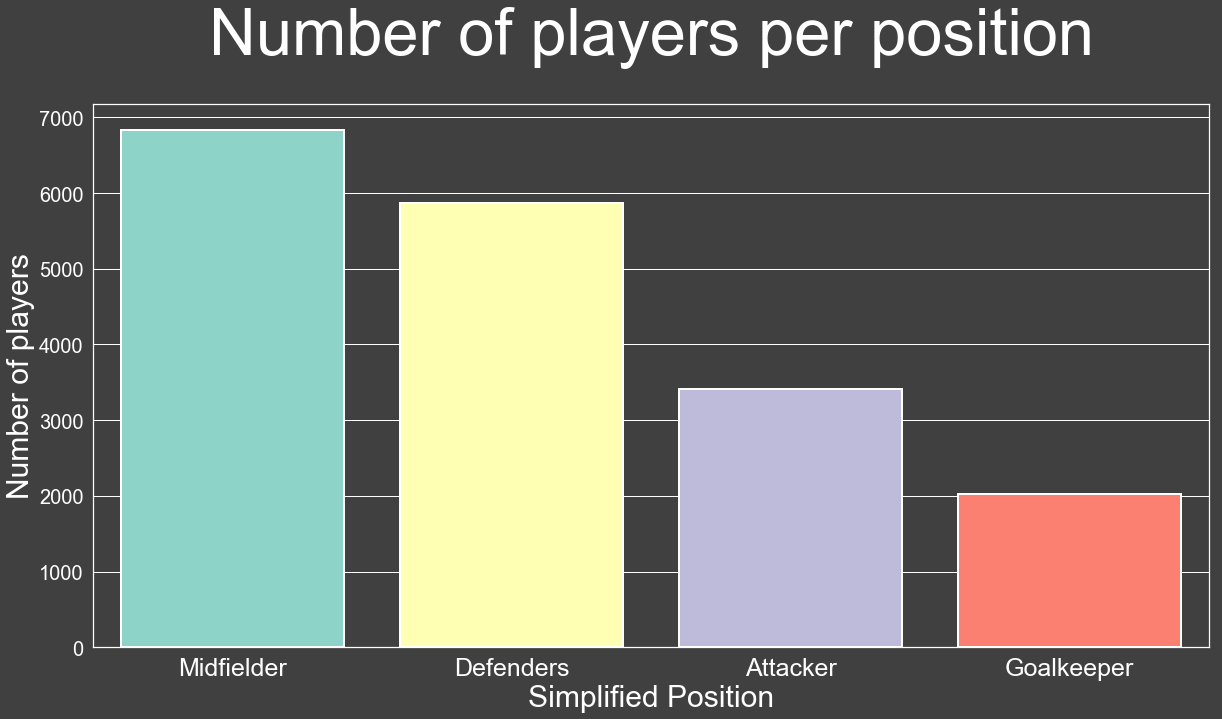

In [12]:
#position distribution

bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

df_temp = df[df['SimplifiedPosition'] != 'NaN']
p= sns.countplot(data=df_temp, 
                 x='SimplifiedPosition',
                 palette="Set3",
                 saturation =1,
                 linewidth=2,
                 order=df_temp['SimplifiedPosition'].value_counts().sort_values(ascending=False).index)

p.axes.xaxis.label.set_text("Simplified Position")
p.axes.yaxis.label.set_text("Number of players")
p.get_legend()
p.set_title("Number of players per position",fontsize = 65, color='white',y=1.08)

In [13]:
# adjusting dates columns
df[['Joined']] = pd.to_datetime(df['Joined'],infer_datetime_format=True)

In [14]:
# adjusting dates columns
df[['Contract Valid Until']] = pd.to_datetime(df['Contract Valid Until'],infer_datetime_format=True)

In [15]:
#check columns dates format
df[['Joined', 'Contract Valid Until']].head()

,Joined,Contract Valid Until
0,2004-07-01,2021-01-01
1,2018-07-10,2022-01-01
2,2017-08-03,2022-01-01
3,2011-07-01,2020-01-01
4,2015-08-30,2023-01-01


Text(0.5,1.08,'Top10 players by wage')

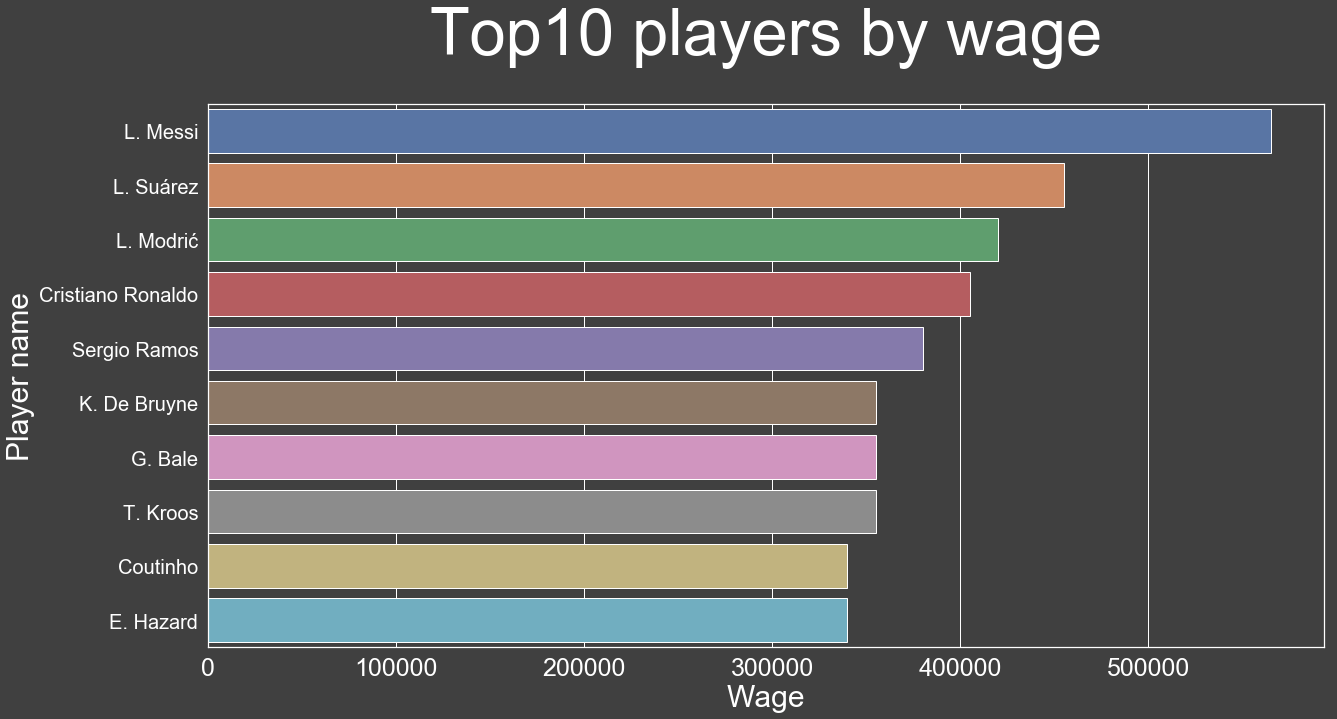

In [16]:
# top10players by wage
df_temp= df[['Wage','Name']].sort_values(by=['Wage'], ascending = False).head(10)

bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p= sns.barplot(x= 'Wage', 
               y= 'Name', 
               data=df_temp)

p.axes.xaxis.label.set_text("Wage")
p.axes.yaxis.label.set_text("Player name")
p.get_legend()
p.set_title("Top10 players by wage",fontsize = 65, color='white',y=1.08)

In [17]:
## Wage VS value distribution

Text(0.5,1.08,'Wage VS Value distributiuon')

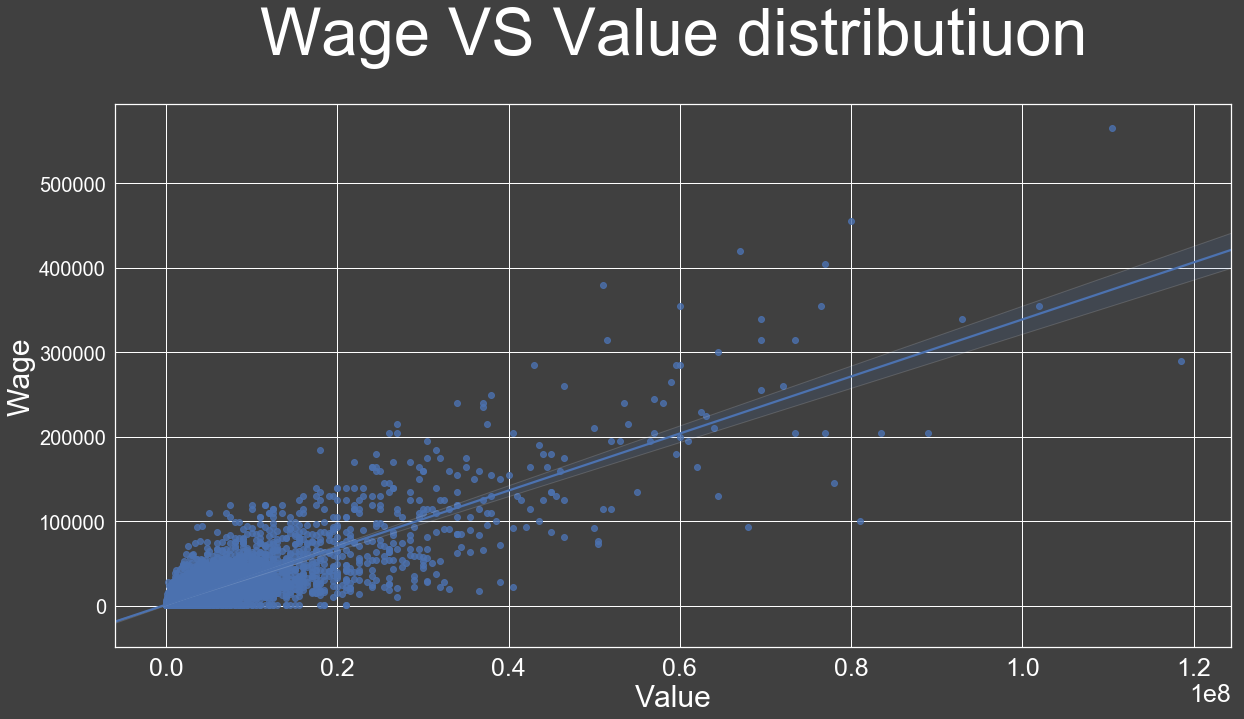

In [18]:
# wage VS value distribution 
p = sns.regplot('Value', 'Wage', data= df) 

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Value")
p.axes.yaxis.label.set_text("Wage")
p.get_legend()
p.set_title("Wage VS Value distributiuon",fontsize = 65, color='white',y=1.08)

In [19]:
## Distribution of the overall parameter VS value¶

Text(0.5,1.08,'Overall parameter VS Value distributiuon')

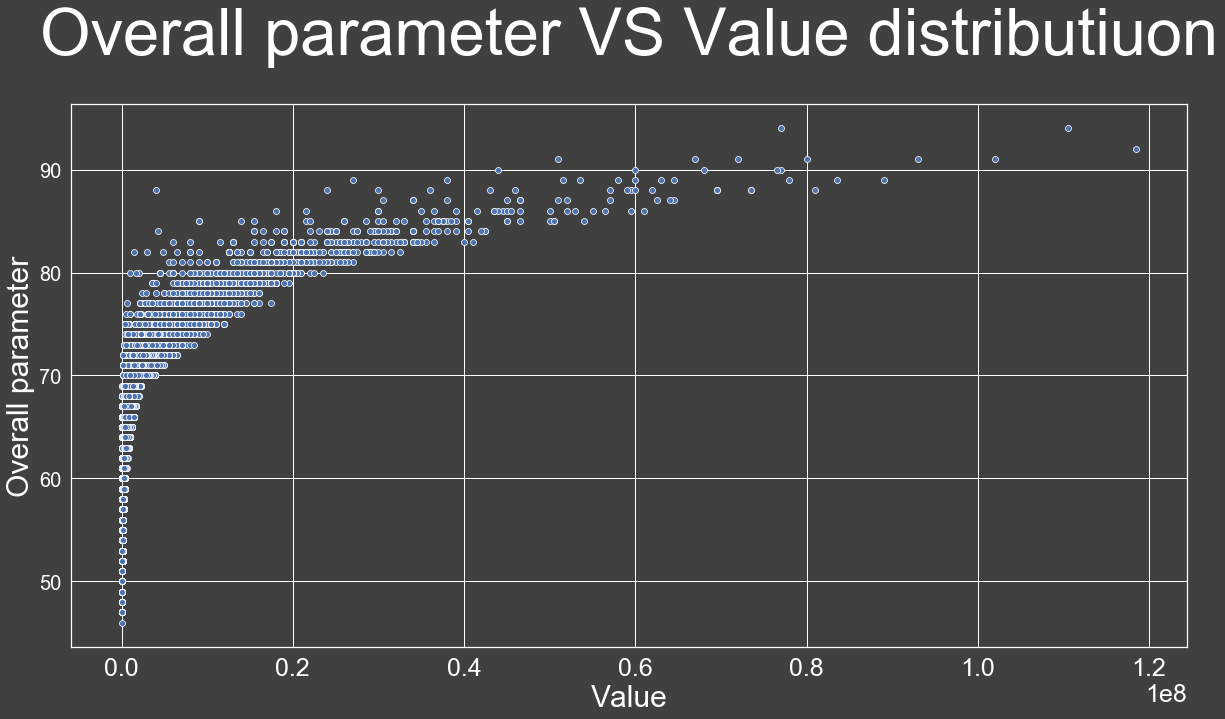

In [20]:
# value distribution
p = sns.scatterplot('Value', 'Overall', data= df) 
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Value")
p.axes.yaxis.label.set_text("Overall parameter")
p.get_legend()
p.set_title("Overall parameter VS Value distributiuon",fontsize = 65, color='white',y=1.08)

In [21]:
## Top10 nations per value

Text(0.5,1.08,'TOP10 Nations per value')

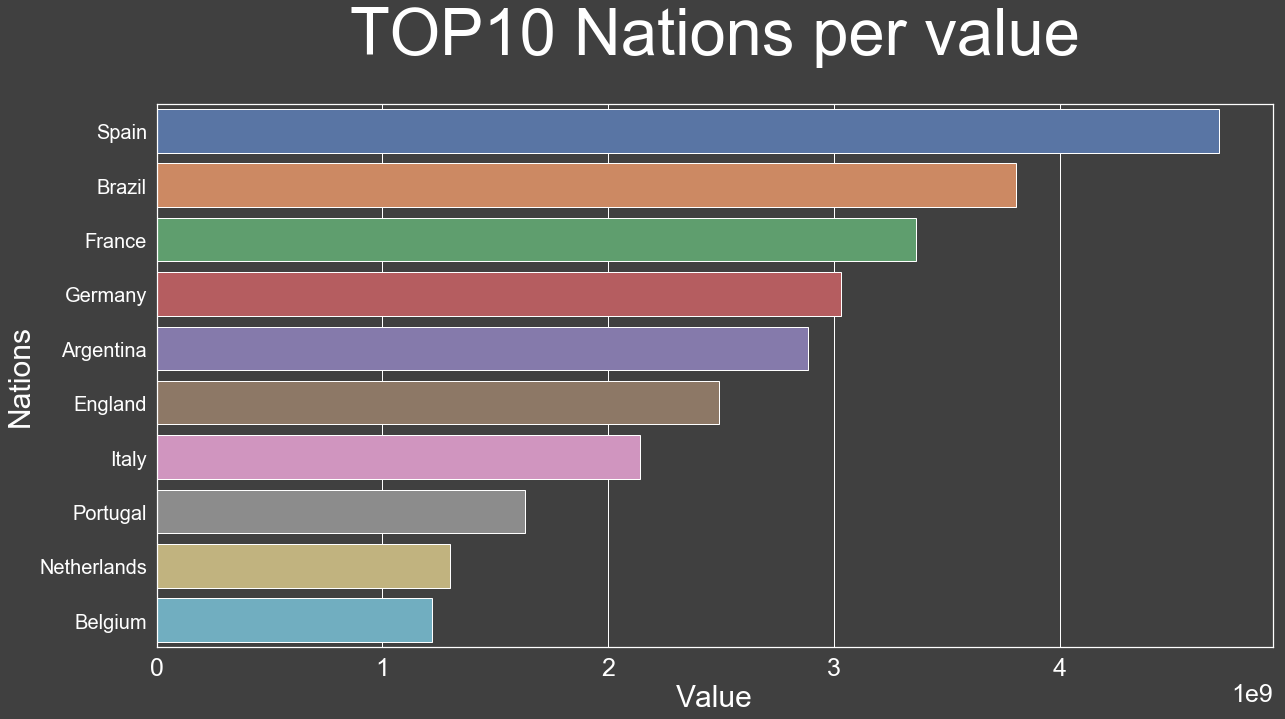

In [22]:
# top10 nations by value
top10nations= df.groupby('Nationality').sum().sort_values(by='Value',ascending =False).head(10).reset_index()
p = sns.barplot(x= 'Value', y= 'Nationality', data=top10nations)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Value")
p.axes.yaxis.label.set_text("Nations")
p.get_legend()
p.set_title("TOP10 Nations per value",fontsize = 65, color='white',y=1.08)

In [23]:
## Top10 clubs by value

Text(0.5,1.08,'TOP10 clubs by value')

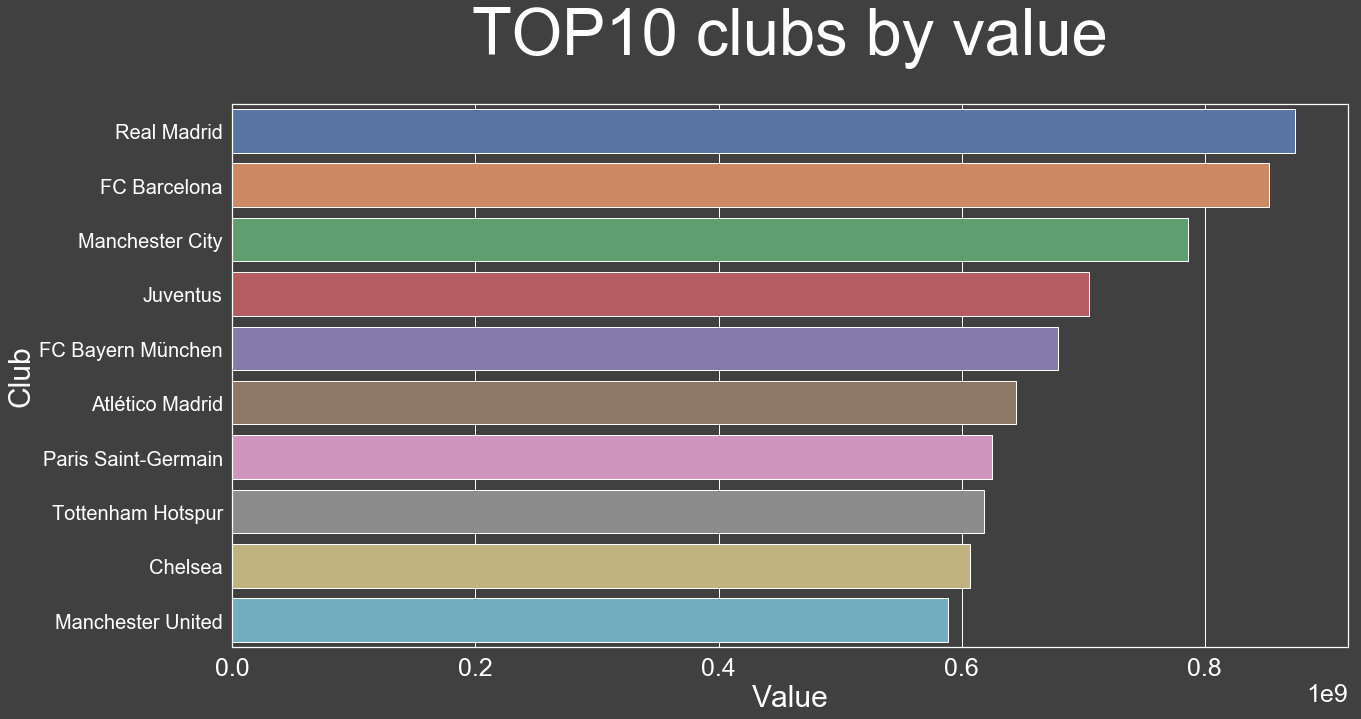

In [24]:
# top10 clubs by value
top10clubs= df.groupby('Club').sum().sort_values(by='Value',ascending =False).head(10).reset_index()
p= sns.barplot(x= 'Value', y= 'Club', data=top10clubs)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Value")
p.axes.yaxis.label.set_text("Club")
p.get_legend()
p.set_title("TOP10 clubs by value",fontsize = 65, color='white',y=1.08)


In [25]:
## Top10 clubs by players in the 90th percentile value

Text(0.5,1.08,'TOP10 clubs by players in the 90th percentile value')

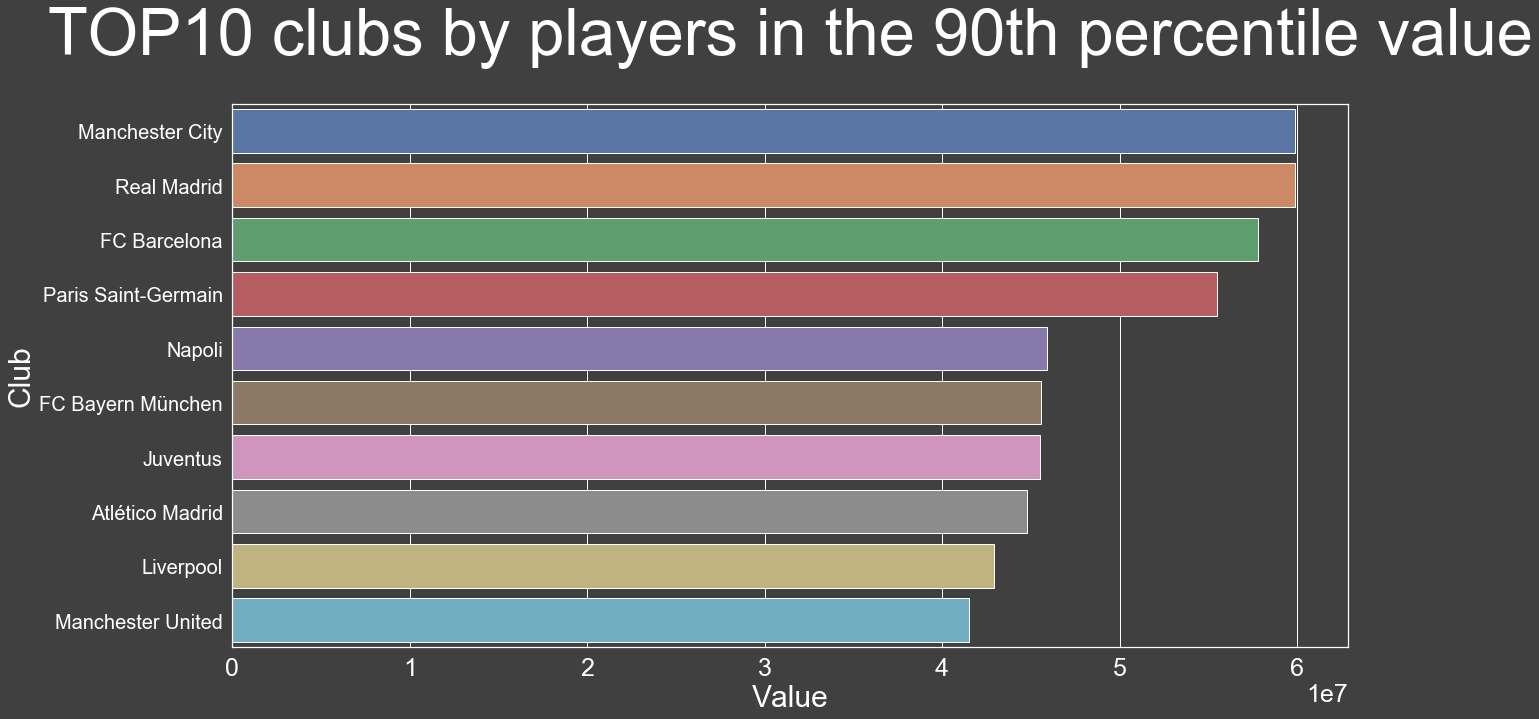

In [26]:
# top10 clubs per value with palyers in the 90th quantile value
topclubs = df.groupby('Club')['Value'].apply(lambda g: g.quantile(.9)).sort_values(ascending=False).reset_index().head(10)
p = sns.barplot(x= 'Value', y= 'Club', data=topclubs)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Value")
p.axes.yaxis.label.set_text("Club")
p.get_legend()
p.set_title("TOP10 clubs by players in the 90th percentile value",fontsize = 65, color='white',y=1.08)

In [27]:
## Top10 players per growth potential

Text(0.5,1.08,'TOP10 players per growth potential')

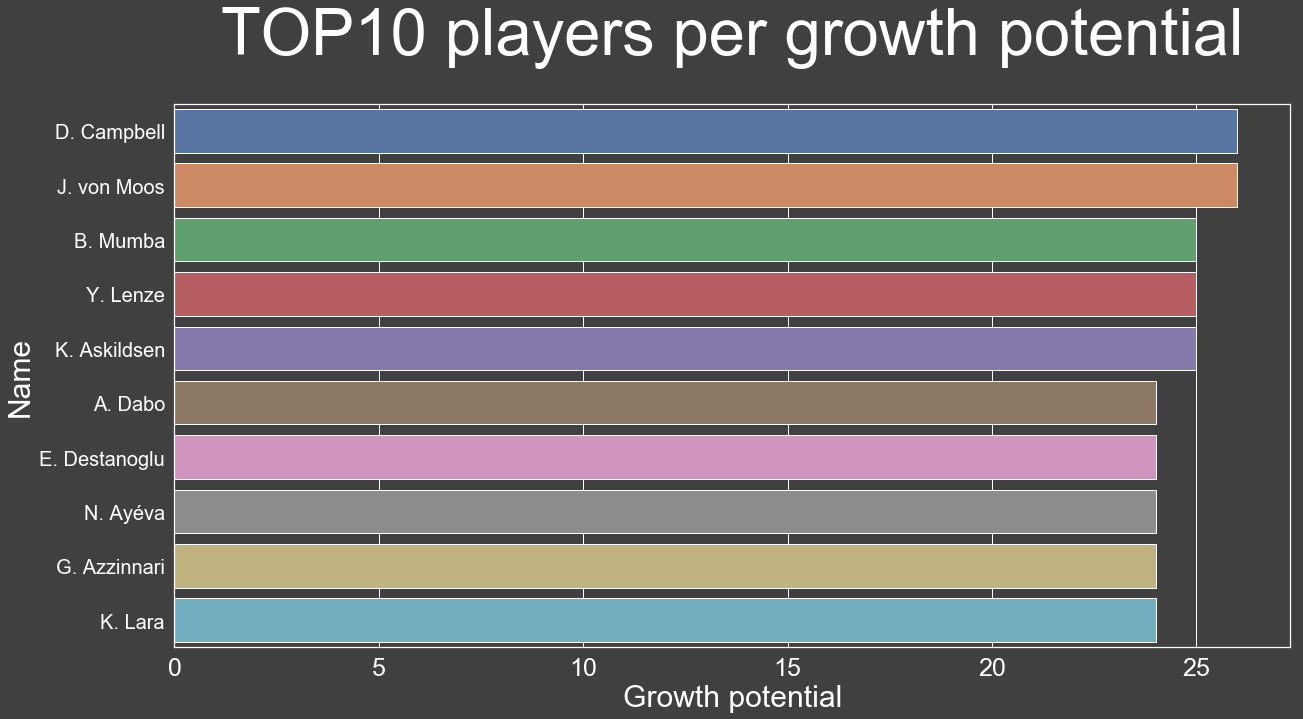

In [28]:
#growth potential value
df['Growth Potential'] = abs(df['Potential']-df['Overall'])
toppot = df[['Name','Growth Potential']].sort_values(by='Growth Potential', ascending = False).head(10)
p= sns.barplot(x= 'Growth Potential', y= 'Name', data=toppot)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Growth potential")
p.axes.yaxis.label.set_text("Name")
p.get_legend()
p.set_title("TOP10 players per growth potential",fontsize = 65, color='white',y=1.08)

In [29]:
## Top10 players per growth potential with potential over 90

Text(0.5,1.08,'TOP10 players per growth potential with potential over 90')

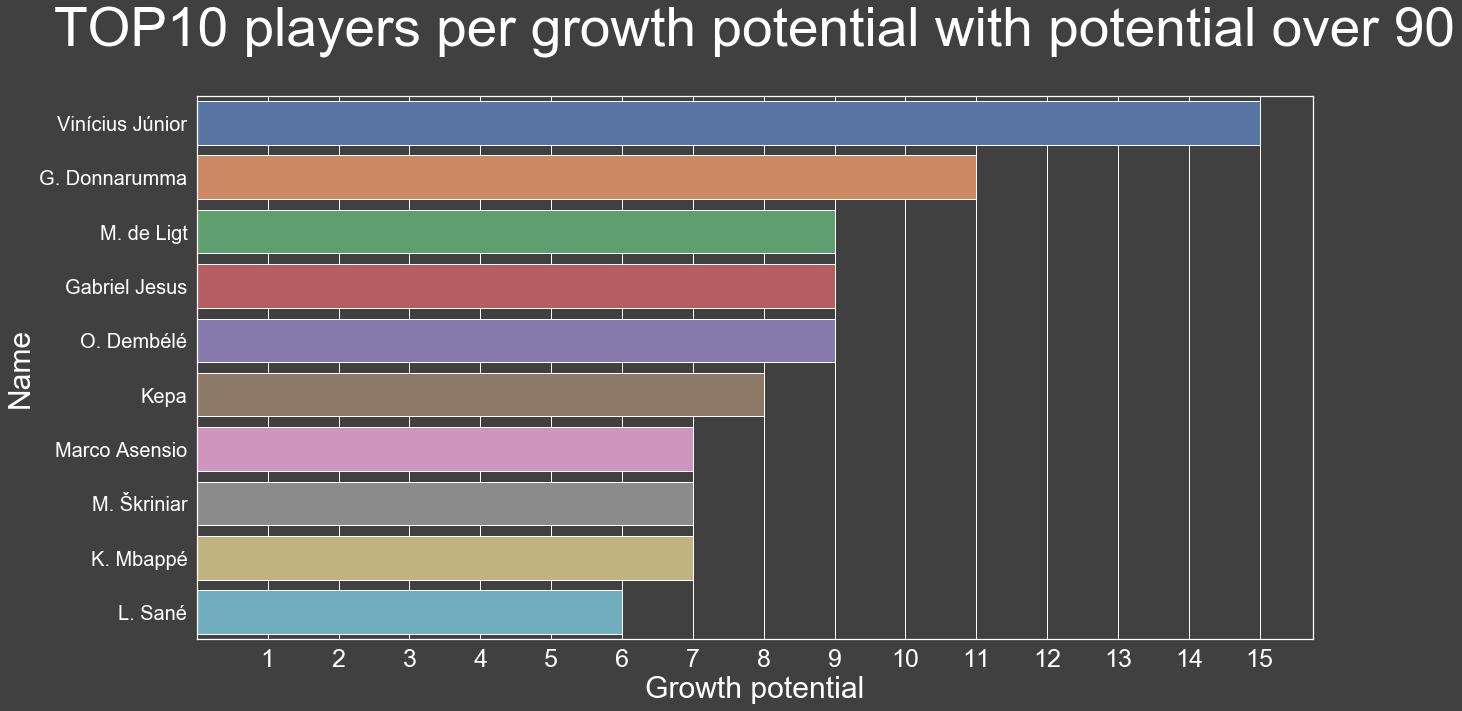

In [30]:
# top 10 player per growth potential with potential over 90
toppot_2 = df[df['Potential']>90]
toppot_2 = toppot_2[['Name','Growth Potential']].sort_values(by='Growth Potential', ascending = False).head(10)
p = sns.barplot(x= 'Growth Potential', y= 'Name', data=toppot_2)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.set_xticks(np.arange(1,toppot_2['Growth Potential'].max()+1,1))
p.axes.xaxis.label.set_text("Growth potential")
p.axes.yaxis.label.set_text("Name")
p.get_legend()
p.set_title("TOP10 players per growth potential with potential over 90",fontsize = 55, color='white',y=1.08)

In [31]:
## Top10 teams per players loaned

Text(0.5,1.08,'TOP10 teams per players loaned')

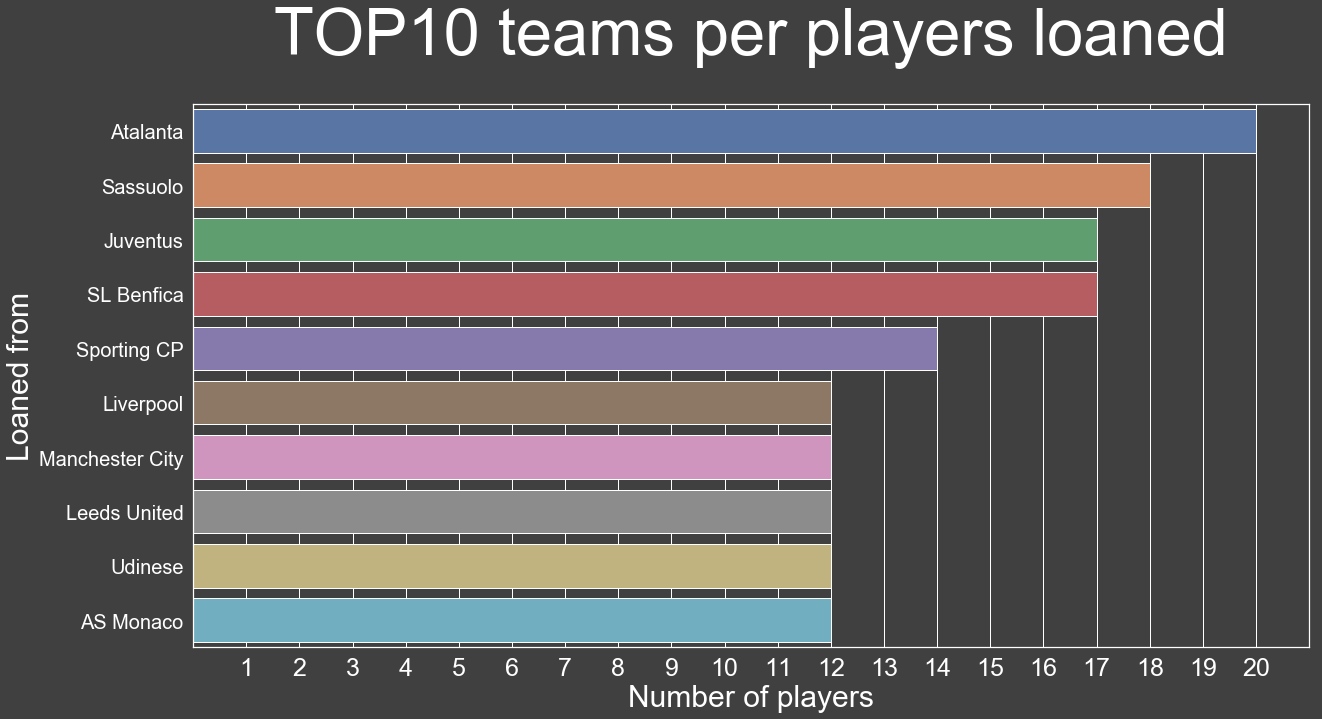

In [32]:
# TOP10 teams per players loaned
loaned = df.groupby('Loaned From')['Name'].count().sort_values(ascending = False).reset_index().head(10)
p = sns.barplot(x= 'Name', y= 'Loaned From', data=loaned)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20,
            })
p.set_xticks(np.arange(1,loaned['Name'].max()+1,1))
p.axes.xaxis.label.set_text("Number of players")
p.axes.yaxis.label.set_text("Loaned from")
p.get_legend()
p.set_title("TOP10 teams per players loaned",fontsize = 65, color='white',y=1.08)

In [33]:
## Players comparison with user-defined characteristics

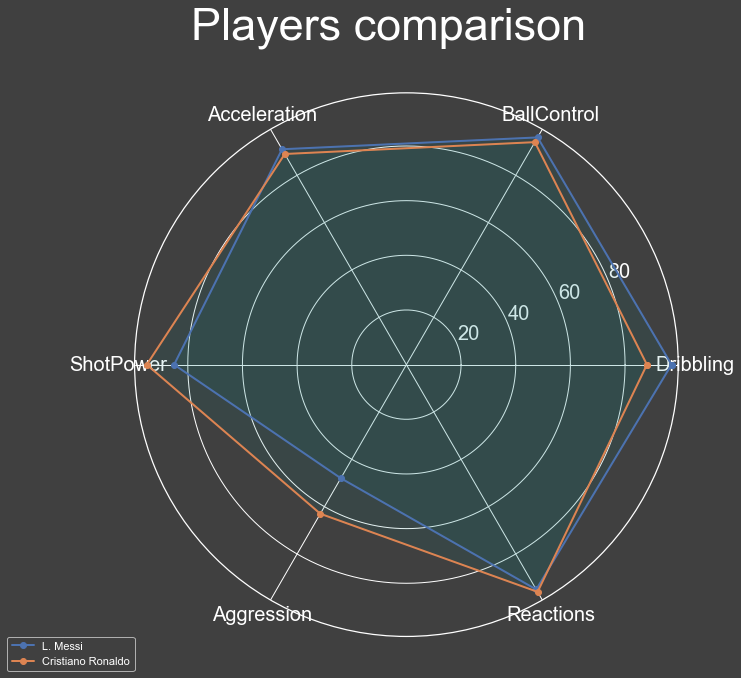

In [34]:
df = df.set_index('Name')
def plot_radar(player_names, features):
    fig=plt.figure()
    ax = fig.add_subplot(111, polar=True)
    for i in player_names:
        labels=np.array(features)
        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        stats= df.loc[i,labels].values
        stats=np.concatenate((stats,[stats[0]]))
        angles=np.concatenate((angles,[angles[0]]))
        ax.plot(angles, stats, 'o-', linewidth=2, label = i)
        ax.fill(angles, stats, 'teal',alpha=0.1)
        ax.set_thetagrids(angles * 180/np.pi, labels)
        ax.get_xticklabels()
        for label,rot in zip(ax.get_xticklabels(),angles):
            label.set_rotation(rot*180./np.pi)
            label.set_horizontalalignment("center")
            label.set_rotation_mode("anchor")
        ax.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=(0.01, 0.01))
    plt.suptitle("Players comparison",fontsize = 45, color='white',y=1.00)

list_of_players = ['L. Messi','Cristiano Ronaldo']
list_of_features = ['Dribbling', 'BallControl', 'Acceleration', 'ShotPower','Aggression','Reactions']
    
p = plot_radar(list_of_players, list_of_features)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':20,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20,
            })

In [35]:
## Correlation matrix between all the characteristics

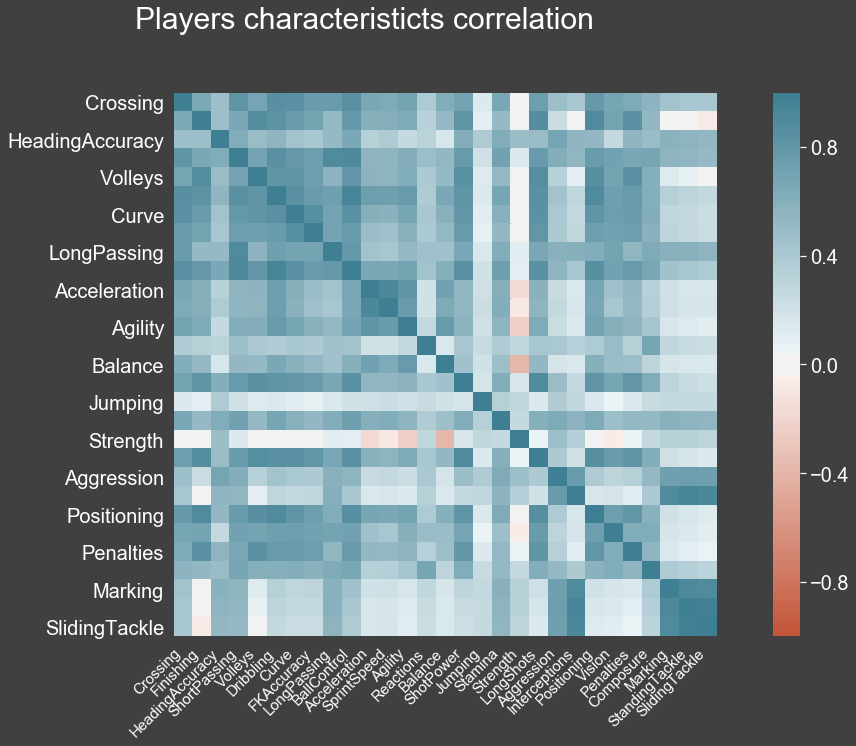

In [36]:
data = df[['Crossing',
    'Finishing',
    'HeadingAccuracy',
    'ShortPassing',
    'Volleys',
    'Dribbling',
    'Curve',
    'FKAccuracy',
    'LongPassing',
    'BallControl',
    'Acceleration',
    'SprintSpeed',
    'Agility',
    'Reactions',
    'Balance',
    'ShotPower',
    'Jumping',
    'Stamina',
    'Strength',
    'LongShots',
    'Aggression',
    'Interceptions',
    'Positioning',
    'Vision',
    'Penalties',
    'Composure',
    'Marking',
    'StandingTackle',
    'SlidingTackle']]
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20,
            })
plt.suptitle("Players characteristicts correlation",fontsize = 30, color='white',y=1.00)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize =15
);

In [37]:
df = pickle.load(open("df.pickle", "rb"))

In [38]:
# Regression to predict the overall value from the other characteristics. The result is good with a median of 0.03 points over 100 total of evaluation.
df = df.set_index('Name')
df = df.fillna(0)

x = np.array(df.iloc[:,53:87])
y = np.array(df.iloc[:,6])
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
# coefficient of determination: 0.8615939258756776
print('intercept:', model.intercept_)
# intercept: 5.52257927519819
print('slope:', model.coef_)
# slope: [0.44706965 0.25502548]
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response:', y_pred, sep='\n')

print ((y_pred-df['Overall']))

# x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
# y = [4, 5, 20, 14, 32, 22, 38, 43]
# x, y = np.array(x), np.array(y)
# print (x, y)

coefficient of determination: 0.7588246817366603
intercept: 27.242942967316928
slope: [ 0.02698179  0.02136673  0.05181192  0.04989028  0.00912932  0.0146129
  0.01760534 -0.00205903 -0.00960711  0.12733606  0.01410257  0.01367295
 -0.00790848  0.29643583 -0.09287477  0.01371368  0.00247105  0.01531932
 -0.02943342  0.0037446   0.00712351  0.0205051  -0.04597055 -0.02224272
 -0.02230332  0.13836305  0.02848932  0.00889674 -0.03668452  0.0496097
  0.03772565  0.00212247  0.06055227  0.05866097]
predicted response:
[85.10897028 88.04430188 85.19164796 ... 54.99445349 47.41319054
 57.51075266]
predicted response:
[85.10897028 88.04430188 85.19164796 ... 54.99445349 47.41319054
 57.51075266]
Name
L. Messi                -8.891030
Cristiano Ronaldo       -5.955698
Neymar Jr               -6.808352
De Gea                  -4.474528
K. De Bruyne            -6.446015
E. Hazard               -8.682762
L. Modrić               -9.184448
L. Suárez               -3.075806
Sergio Ramos            -8

In [39]:
print ('result:',(y_pred-df['Overall']).median())

result: 0.028753722849813812


In [40]:
## Correlation between overall value, value, wage and potential

Text(0.5,1,'Overall characteristicts correlation')

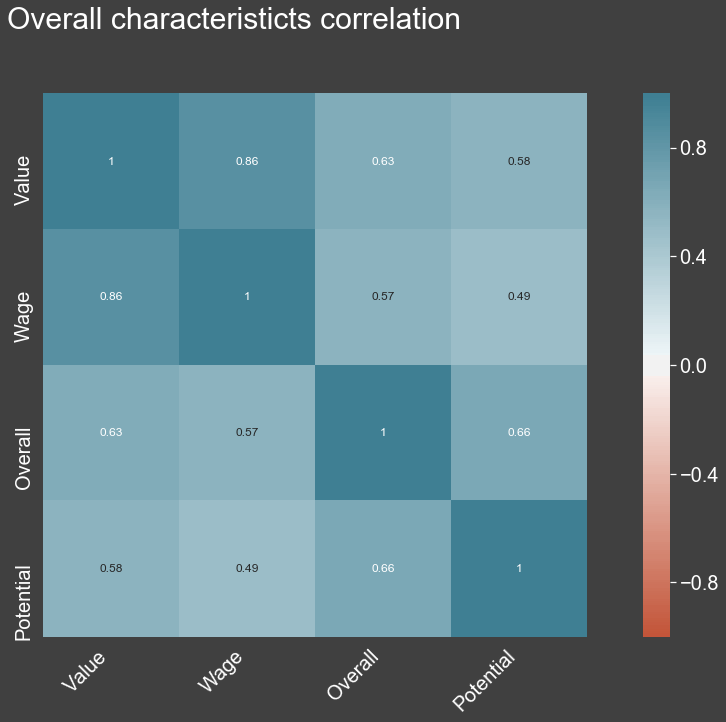

In [41]:
#correlation Value Wage Overall
data = df[['Value','Wage','Overall','Potential']]
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20,
            })

plt.suptitle("Overall characteristicts correlation",fontsize = 30, color='white',y=1.00)

In [42]:
## Correlation value, international reputation and release clause

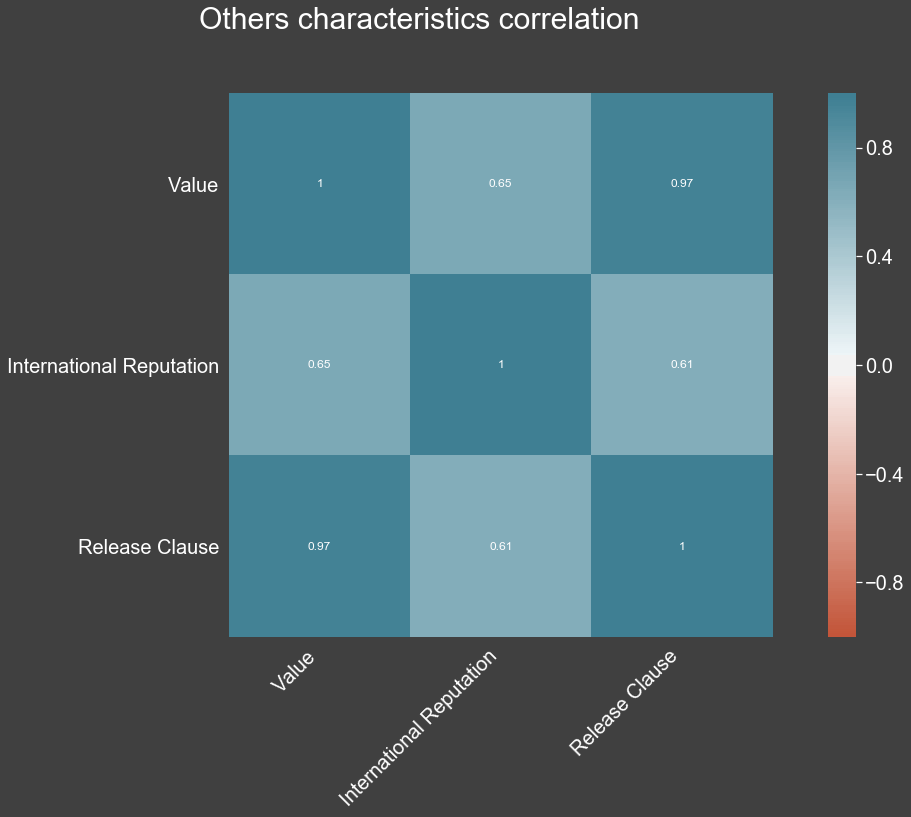

In [43]:
#correlation Value Wage Overall
data = df[['Value','International Reputation','Release Clause']]
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.suptitle("Others characteristics correlation",fontsize = 30, color='white',y=1.00)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20,
            })

In [44]:
df.shape

(18207, 89)

In [45]:
# def set_pandas_options() -> None:
#    pd.options.display.max_columns = 1000
#    pd.options.display.max_rows = 5000
#    pd.options.display.max_colwidth = 199
#    pd.options.display.width = None
# set_pandas_options()
df.iloc[0,:]

Unnamed: 0                                                               0
ID                                                                  158023
Age                                                                     31
Photo                       https://cdn.sofifa.org/players/4/19/158023.png
Nationality                                                      Argentina
Flag                                   https://cdn.sofifa.org/flags/52.png
Overall                                                                 94
Potential                                                               94
Club                                                          FC Barcelona
Club Logo                     https://cdn.sofifa.org/teams/2/light/241.png
Value                                                            1.105e+08
Wage                                                                565000
Special                                                               2202
Preferred Foot           

In [46]:
df[['Joined']] = pd.to_datetime(df['Joined'],infer_datetime_format=True)
# print (df[['Joined','Contract Valid Until']].head(10))

In [47]:
df[['Contract Valid Until']] = pd.to_datetime(df['Contract Valid Until'],infer_datetime_format=True)
# print (df[['Joined','Contract Valid Until']].head(10))

In [48]:
df[['Joined','Contract Valid Until']].head(10)

,Joined,Contract Valid Until
Name,,
L. Messi,2004-07-01,2021-01-01
Cristiano Ronaldo,2018-07-10,2022-01-01
Neymar Jr,2017-08-03,2022-01-01
De Gea,2011-07-01,2020-01-01
K. De Bruyne,2015-08-30,2023-01-01
E. Hazard,2012-07-01,2020-01-01
L. Modrić,2012-08-01,2020-01-01
L. Suárez,2014-07-11,2021-01-01
Sergio Ramos,2005-08-01,2020-01-01


In [49]:
# Regression to predict the overall value starting from the value, wage and potential. The result is still acceptable with a median of the difference of 1.23 points over 100 total of evaluation.
df = df.fillna(0)

x = np.array(df[['Value','Wage','Potential']])
y = np.array(df['Overall'])
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
# coefficient of determination
print('intercept:', model.intercept_)
# intercept
print('slope:', model.coef_)
# slope
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response:', y_pred, sep='\n')

print ('median diff:',(y_pred-df['Overall']).median())


coefficient of determination: 0.532905180162478
intercept: 28.92408447424755
slope: [3.03598124e-07 4.45495341e-05 5.06949598e-01]
predicted response:
[135.29542614 117.99696354 124.96613966 ...  62.95247296  62.44552336
  62.44552336]
predicted response:
[135.29542614 117.99696354 124.96613966 ...  62.95247296  62.44552336
  62.44552336]
median diff: -1.2308223541530197


In [50]:
## Machine Learning technique - DecisionTreeClassifier
#It predicts the simplified position of a player starting from his characteristics with a accuracy of (85%).

label = ['SimplifiedPosition']
X = df.iloc[:,53:87] # Features
y = df[label] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=8)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8533772652388797


In [51]:
total = df.loc[:,"Release Clause"].sum()
print(total)

76309170000.0


In [52]:
total = df.loc[:,"Value"].sum()
print(total)

43891540000.0


In [53]:
total = df.loc[:,"Wage"].sum()
print(total)

177178000.0
